In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score , train_test_split , RandomizedSearchCV , GridSearchCV
from sklearn.metrics import classification_report
from scipy import stats

In [7]:
data = pd.read_csv('diabetes.csv')

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# EDA and Outlier Detection

<Axes: xlabel='Pregnancies', ylabel='Count'>

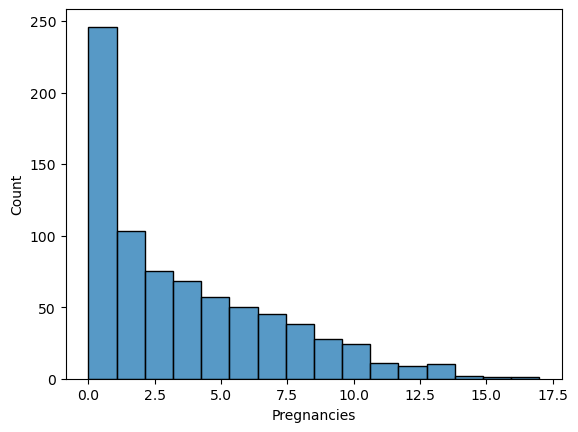

In [13]:
sns.histplot(data['Pregnancies'])

<Axes: xlabel='Glucose', ylabel='Count'>

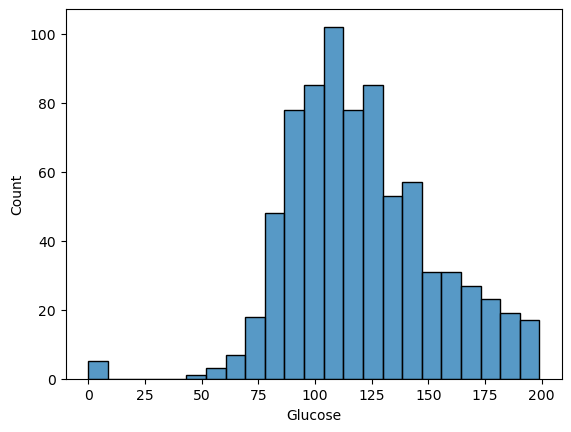

In [14]:
# Glucose
sns.histplot(data['Glucose'])

<Axes: xlabel='BMI', ylabel='Count'>

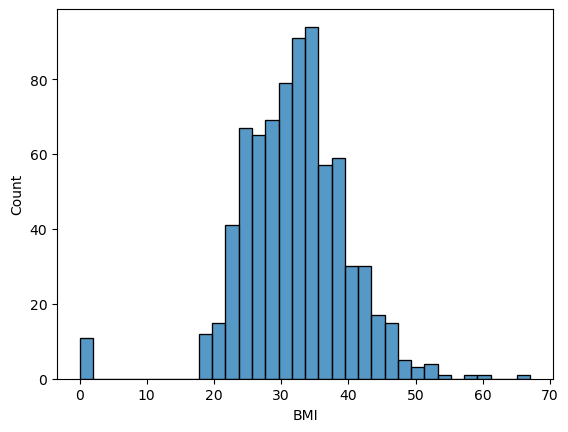

In [15]:
sns.histplot(data['BMI'])

<Axes: ylabel='count'>

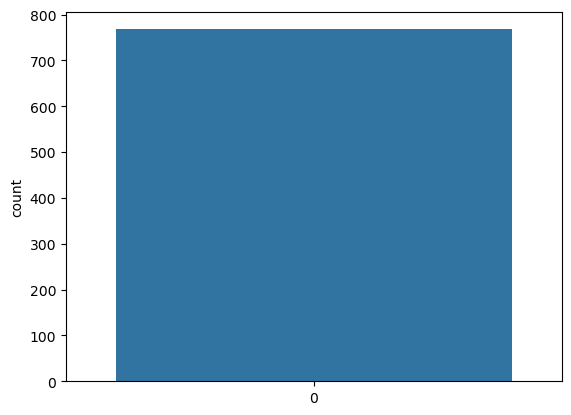

In [16]:
sns.countplot(data['Outcome'])

In [17]:
# Missing Data

In [18]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [21]:
imputer = KNNImputer(n_neighbors=5)
imputer.fit(X)

KNNImputer()

In [22]:
X = imputer.transform(X)

In [23]:
# StandardScaler
st = StandardScaler()
st.fit(X)
X = st.transform(X)

In [24]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [25]:
# Model

In [26]:
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

models = {
    "lr" : LogisticRegression(random_state=123),
#     "DT" : DecisionTreeClassifier(random_state=123),
#     "RF" : RandomForestClassifier(max_depth=2, random_state=123),
    'KNN' : KNeighborsClassifier(),
    "SVM" : SVC(),
    "Ada" : AdaBoostClassifier(random_state=123)
#     "GBC" : GradientBoostingClassifier(random_state=123),
#     "HGBC" : HistGradientBoostingClassifier(random_state=123)
}

In [27]:
# GridSearch for Fine-Tune Model

In [28]:
Ada = AdaBoostClassifier(random_state=123 )

grid_list = {
    "learning_rate": [1,0.01,0.001],
    "n_estimators": [20,15,10,5],
}
              
grid_search = GridSearchCV(Ada, param_grid = grid_list, cv = 4,) 
grid_search.fit(X_train , y_train)


print("gridSearch Best Score :",grid_search.best_score_)
print("gridSearch Best params :",grid_search.best_params_)

gridSearch Best Score : 0.768695356930651
gridSearch Best params : {'learning_rate': 1, 'n_estimators': 15}
